# **Advanced Data Science Capstone: Automated Image Processing for Breast Tumor Biopsies**

## **Initial Data Exploration Notebook**

Author: Fernando M. Delgado Chaves



## 1. Introduction

## Wisconsin Breast Cancer Dataset
> Street, W. N., Wolberg, W. H., & Mangasarian, O. L. (1993, July). Nuclear feature extraction for breast tumor diagnosis. In Biomedical image processing and biomedical visualization (Vol. 1905, pp. 861-870). International Society for Optics and Photonics.
> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The 1993 Street et al. Breast Cancer Wisconsin (Diagnostic) Data Set collects information from 569 breast tumor biopsies, of which 357 are benign and 212 are malignant. The biopsies were obtained by fine needle aspiration. A small portion of the tumor tissue is then placed on a slide and stained for imaging. With an interactive system, an outline is established near the limits of individual cell nuclei. These contours are deformed to fit the exact morphology of the nuclei, thus allowing for precise and automated analysis of the size, shape, and texture of the nuclei. An example of this segmentation is shown below:
<center><img src="segmentation.png" width="300">



The parameters/features analyzed in each sample/instance are the following:
1. Radius: The radius of an individual nucleus is measured by averaging the length of the segments defined by the centroid of the contour and the individual points that draw the contour.
2. Texture: For a grayscale image, the pixel value is a single number that represents the brightness of the pixel. The texture of the cell's core is measured by finding the variation of the grayscale intensities in the component pixels.
3. Perimeter: The total distance formed by the contour points constitutes the nuclear perimeter.
4. Area: The nuclear area is measured by counting the number of pixels inside the outline and adding half of the perimeter pixels.
5. Smoothness: The smoothness of a nuclear contour is quantified by measuring the difference between the length of a radial line and the average length of the rest of the radial lines. An example can be seen in the Figure below: 

<center><img src="smoothness.png" width="100">


6. Compactness: Perimeter and area are combined to give a measure of the compactness of the cell nuclei using the formula perimeter$^{2}$ / area - 1.0. This dimensionless number is minimal for a circular disc and increases with the irregularity of the boundary. However, this shape measure also increases for elongated cell nuclei, which do not necessarily indicate a higher probability of malignancy. The characteristic is also biased for small cells due to the decrease in precision imposed by the digitization of the sample.
7. Concavity: The mean of the severity of the concavities or clefts in the nucleus of a cell. Segments are drawn between non-adjacent nuclear boundary points and the degree to which the actual boundary of the nucleus is within each string is measured. An example is shown in the Figure below. This parameter is greatly affected by the length of these segments, as smaller segments better capture small concavities. This measure emphasizes the small slits, as larger morphological irregularities are captured by other features.
<center><img src="concavity.png" width="100">

8. Concave points: average for the number of concave portions of the contour. This characteristic is similar to that of concavity, but measures only the number, rather than the degree of concavity.
9. Symmetry: To measure symmetry, the major axis, or the longest segment that passes through the center, is found. Then the difference in length between the lines perpendicular to the major axis is measured up to the cell boundary in both directions. An example can be seen in the Figure below:
<center><img src="symmetry.png" width="100">

10. Fractal dimension: The fractal dimension of a cell is approximated using the 'coastal approximation'. The perimeter of the nucleus is measured with increasingly large 'rules'. As the size of the ruler increases, decreasing the accuracy of the measurement, the observed perimeter decreases. An example can be seen in Figure below. Plotting these values on a recording scale and measuring the downward slope is an approximation of the fractal dimension. As with all characteristics of the shape, a higher value corresponds to a less regular contour and therefore a higher probability of malignancy. 
<center><img src="fractal.png" width="300">

These ten attributes are calculated for a representative subset of the digitized tumor tissue nuclei, thus providing the average value of the subset of nuclei, the largest (or "worst") value found in that subset, and the standard error of each attribute for the range of isolated cells. The dataset used for the analysis is thus composed of 32 attributes and 569 instances. Note that each instance corresponds to one case of breast tumor. The two attributes to be described correspond to the sample identifier and the diagnostic class attribute (benign/malignant). The techniques for supervised and unsupervised learning were performed using Python.

# 2. Results
## 2.1 Initial Data Exploration

The downloaded diagnostic dataset was imported. First, the *id* attribute was removed, as it does not provide any information beyond the identifier of each sample. Another attribute, probably imported by mistake, called *Unnamed 32* was also removed.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
#https://jupyterlab-9.labs.cognitiveclass.ai/hub/user-redirect/lab/tree/labs/User/Advanced%20IBM%20Data%20Science%20/Capstone/data.csv
data_raw = pd.read_csv('data.csv')
data = data_raw.drop(['id', 'Unnamed: 32'], axis=1)
data.head()

In [ ]:
data.diagnosis.value_counts()


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.groupby('diagnosis').describe()

By just looking at the mean, differences are observed between benign and malign samples for multiple features. We can plot this differences in a box plot. For this, data was normalized for improved visualization.

In [7]:
label = data.diagnosis
unlabeled_data = data.drop(['diagnosis'],axis = 1 )

In [8]:
from sklearn import preprocessing

x = unlabeled_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
unlabeled_data_scaled = pd.DataFrame(x_scaled)
unlabeled_data_scaled.columns = unlabeled_data.columns
unlabeled_data_scaled = pd.concat([label, unlabeled_data_scaled], axis=1)
unlabeled_data_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se'),
  Text(20, 0, 'radius_worst'),
  Text(21, 0, 'texture_worst'),
  Text(22, 0, 'perimeter_worst'),
  Text(23, 0, 'area_worst'),
  Text(24, 0, 'smoothness_worst'),
  Text(25, 0, 'compactness_worst'),
  Text(26, 0, 'concavity_

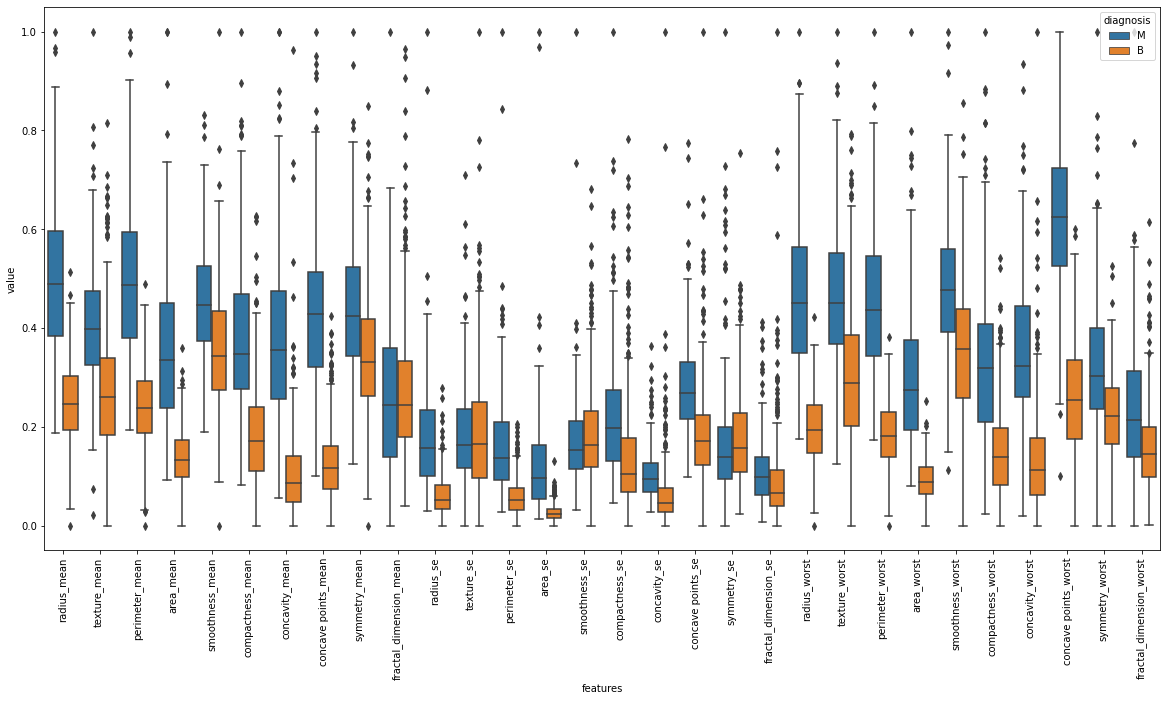

In [9]:
data_melted = pd.melt(unlabeled_data_scaled, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
data_melted.head()
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_melted)
plt.xticks(rotation=90)


The parameters considered critical would be those which most separate data. According to the distributions of the different variables, there are notable differences between the two types of class, malignant and benign. For example, for the attribute 'radius_worst', the mean of the malignant and benign nuclei seems to be separated, which may be useful for later classification techniques. In other cases, as in the 'texture_se' attribute, the mean for malignant and benign tumors does not seem to be separated and therefore is not informative for classification.  

A correlation matrix was used to assess the quality of the features, and how relevant are these for the diagnosis of a sample as benign or malign. I the correlation plot below, highly correlated features are considered redundant and thus one of them can be selected as a group representative. 

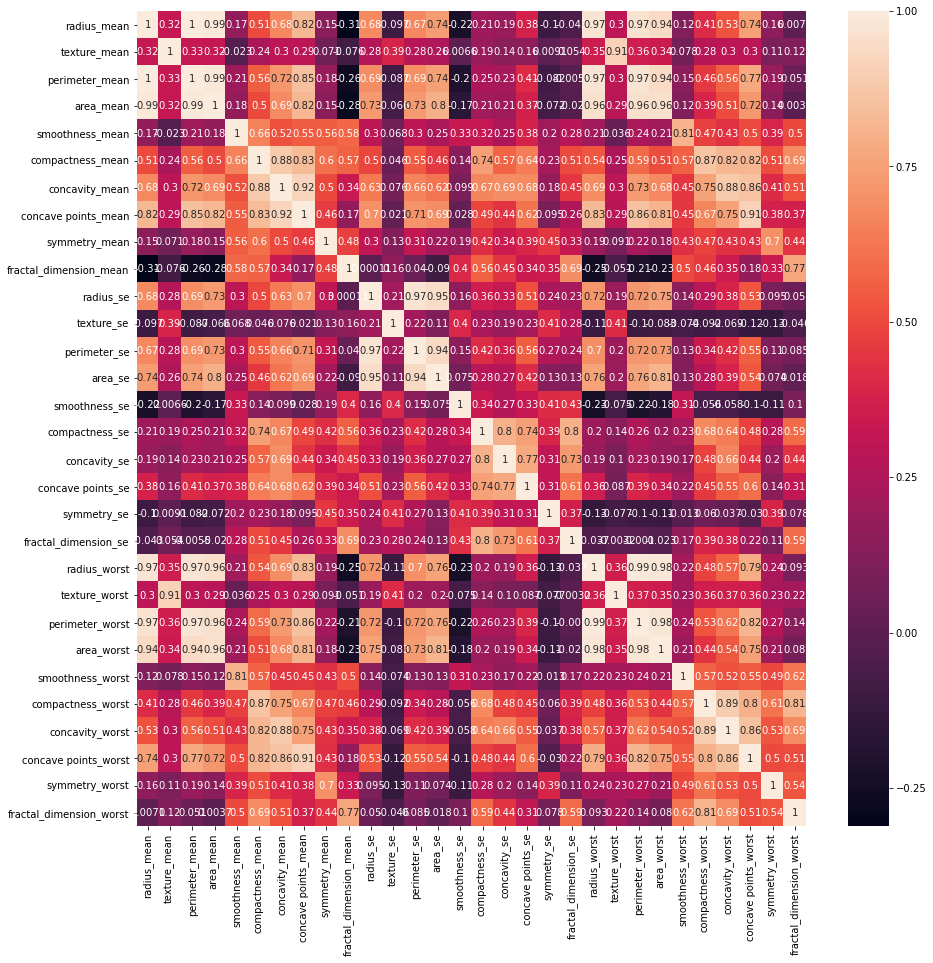

In [55]:
corrMatrix = data.drop(['diagnosis'], axis=1).corr()
#print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Several groups of attributes are found to be correlated, which indicates that they could be dispensed: 
- *compactness mean, concavity mean* and *concave points mean*
- *radius se, perimeter se* and *area se*
- *radius worst, perimeter worst* and *area worst*
- *compactness worst, concavity worst* and *concave points worst*
- *compactness se, concavity se* and *concave points se*
- *texture mean* and *texture worst*
- *area worst* and *area mean*